In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#load data
wine_df = pd.read_csv("/content/sample_data/winequality-red.csv", sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#EDA

In [ ]:
wine_df.shape

(1599, 12)

In [ ]:
#dataset details
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# check for missing values
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#Summary of statistics
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#target varible data count
wine_df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
unique_values_count = wine_df['quality'].nunique()
print(unique_values_count)

6


<Axes: xlabel='quality', ylabel='count'>

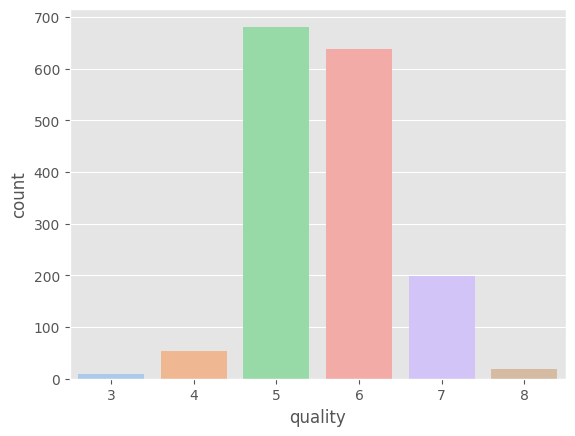

In [ ]:
#Quality over the data
style.use('ggplot')
sns.countplot(x='quality', data=wine_df, palette='pastel')

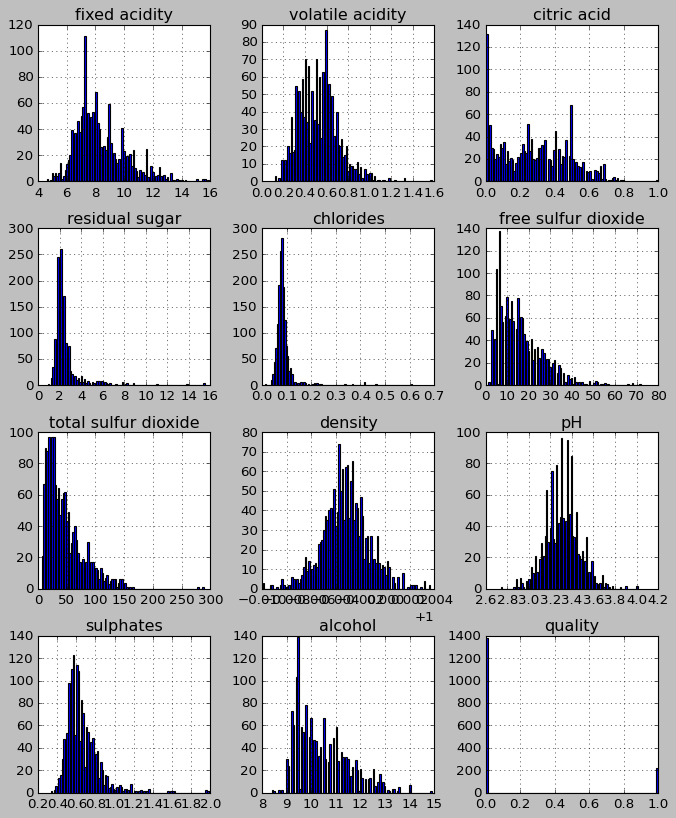

In [ ]:
#visualizing each colomn
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

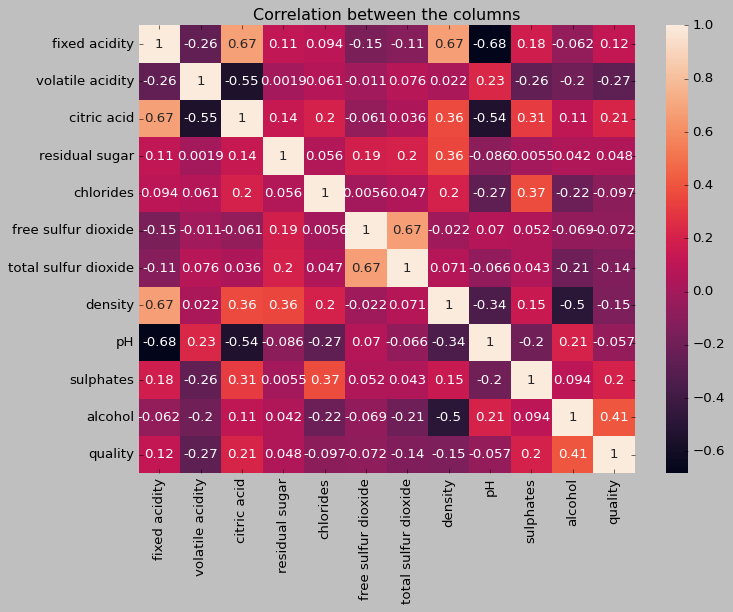

In [ ]:
#corelation matrix
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
#Corelation values
wine_df.corr()['quality'].sort_values()

,quality
volatile acidity,-0.270712
density,-0.150460
total sulfur dioxide,-0.139517
chlorides,-0.097308
free sulfur dioxide,-0.071747
pH,-0.057283
residual sugar,0.047779
fixed acidity,0.120061
sulphates,0.199485
citric acid,0.214716


<Axes: xlabel='quality', ylabel='alcohol'>

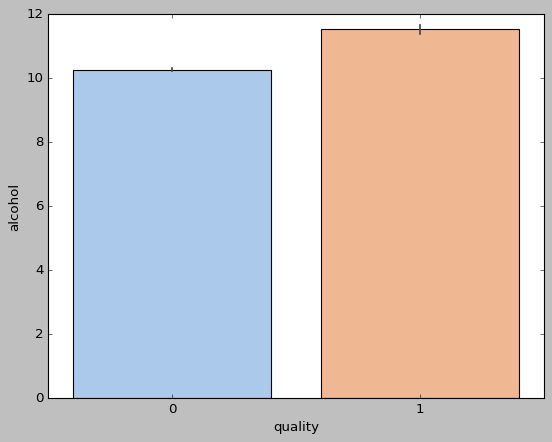

In [ ]:
#alcohol vs quality analysis
sns.barplot(x='quality', y='alcohol', data=wine_df,palette='pastel')

In [ ]:
# more the alcohol higher the quality.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

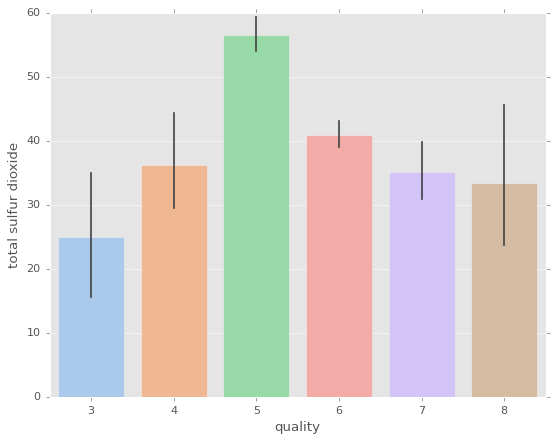

In [ ]:
#totalsulfur dioxide vs quality
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_df,palette='pastel')

Text(0.5, 1.0, 'Wine quality VS alcohol')

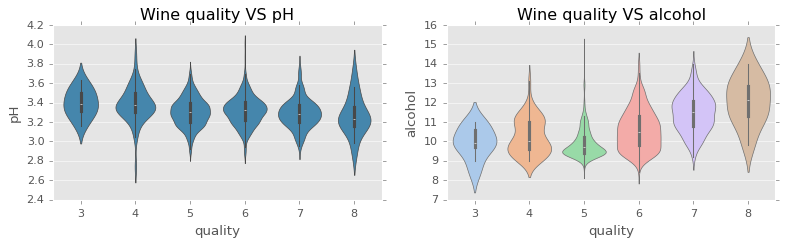

In [ ]:
 #PH and alcohol distribution analysis over quality
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3),(0,0))
sns.violinplot(x='quality', y='pH', data=wine_df)
plt.title("Wine quality VS pH");
plt.subplot2grid((2,3),(0,1))
sns.violinplot(x='quality', y='alcohol', data=wine_df,palette='pastel')
plt.title("Wine quality VS alcohol")


In [ ]:
#alcohol shows strong association with quality, as higher alcohol seems to have higher quality rating but ph doesn't show any trend.

Text(0.5, 0.98, 'Relationship between continuous variables')

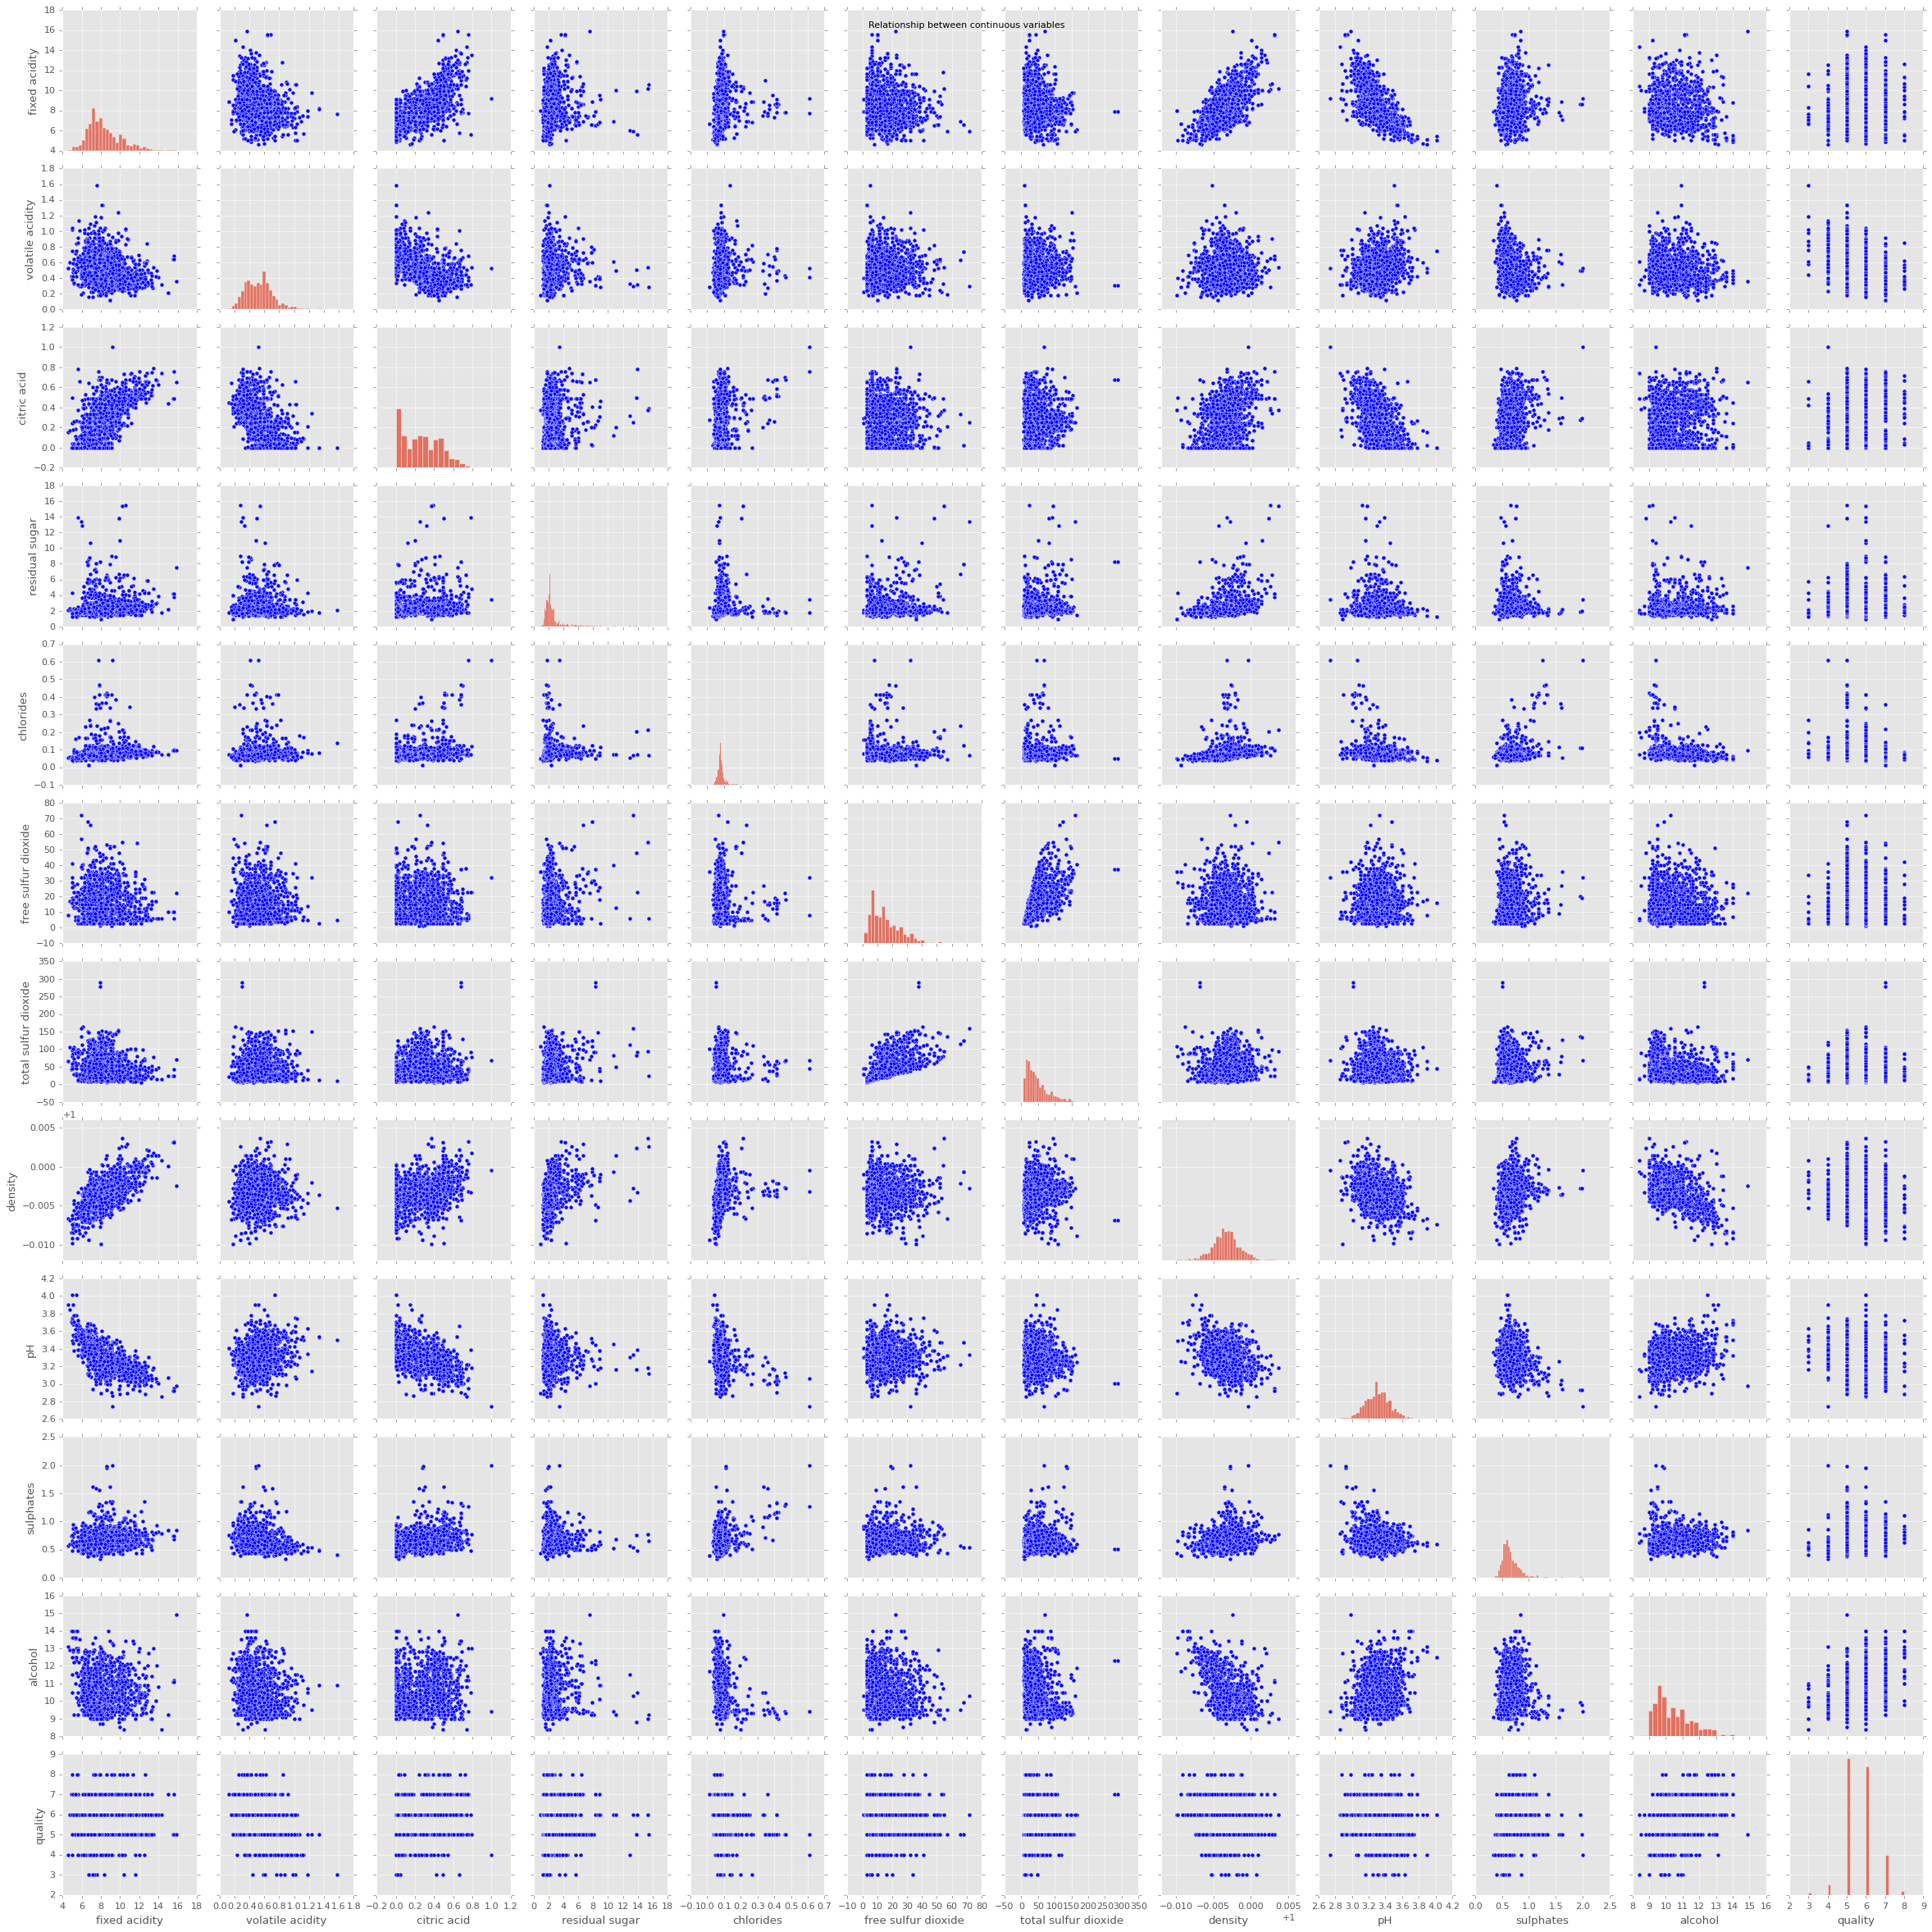

In [ ]:
wine_df.columns
sns.pairplot(wine_df)
plt.suptitle('Relationship between continuous variables')

In [ ]:
#Data Processing

In [ ]:
#binarization of target variable
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)
wine_df['quality'].value_counts()

,count
quality,
0,1382
1,217


In [ ]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [ ]:
#splitting training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


In [ ]:
print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts())

Class distribution in y_train:
quality
0    969
1    150
Name: count, dtype: int64


In [ ]:
# analysis for imbalance class management
from imblearn.over_sampling import SMOTE
# Apply SMOTE before splitting to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Perform stratified splitting on the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)
# Check the class distribution in y_train again
print("Class distribution in y_train after resampling and stratified splitting:")
print(pd.Series(y_train).value_counts())

Class distribution in y_train after resampling and stratified splitting:
quality
1    1041
0    1032
Name: count, dtype: int64


In [ ]:
##Model Training
#DummyClassifier

DummyClassifier Test accuracy: 49.35%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       350
           1       0.49      1.00      0.66       341

    accuracy                           0.49       691
   macro avg       0.25      0.50      0.33       691
weighted avg       0.24      0.49      0.33       691

TN:  0
FN:  0
TP:  341
FP:  350


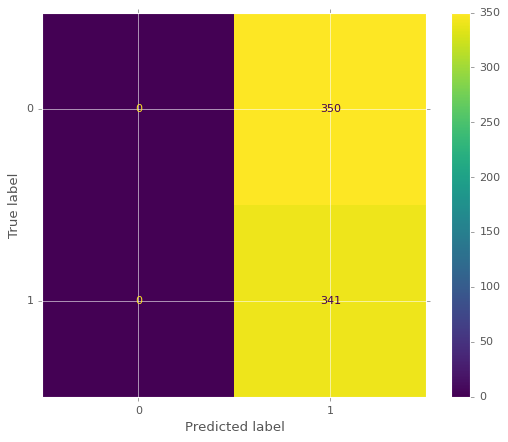

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the DummyClassifier to predict the majority class
dummy_clf = DummyClassifier(strategy="most_frequent")
# Train the DummyClassifier on the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
dummy_pred = dummy_clf.predict(X_test)

# Calculate the accuracy of the DummyClassifier
dummy_acc = accuracy_score(y_test, dummy_pred)
# Print the test accuracy
print("DummyClassifier Test accuracy: {:.2f}%".format(dummy_acc * 100))

# Print the classification report
print(classification_report(y_test, dummy_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, dummy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy_clf.classes_)
disp.plot()

# Print confusion matrix details
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [ ]:
#logistic Regression model

In [ ]:
# Initializing a Logistic Regression model
logreg = LogisticRegression()
# Training the model on the stratified training data
logreg.fit(X_train, y_train)
# Making predictions on the test data
logreg_pred = logreg.predict(X_test)
# Calculating the accuracy of the model
logreg_acc = accuracy_score(logreg_pred, y_test)
# Printing the results
print("Test accuracy is: {:.2f}%".format(logreg_acc * 100))

Test accuracy is: 82.78%


In [ ]:
# Printing the results
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       350
           1       0.82      0.83      0.83       341

    accuracy                           0.83       691
   macro avg       0.83      0.83      0.83       691
weighted avg       0.83      0.83      0.83       691



TN:  290
FN:  59
TP:  282
FP:  60


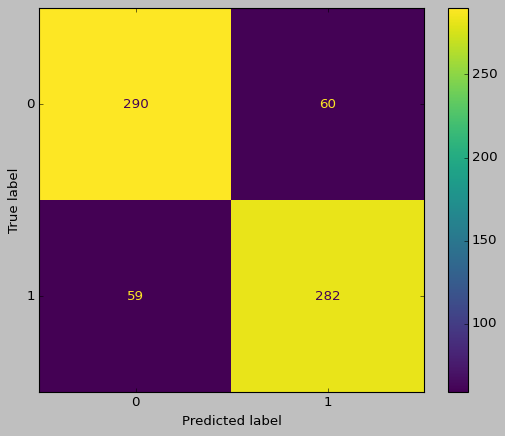

In [ ]:
style.use('classic')
# Generating a confusion matrix for the model predictions
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
# Generating a confusion matrix for the model predictions
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
# Printing the results
print("TN: ", cm[0][0])
# Printing the results
print("FN: ", cm[1][0])
# Printing the results
print("TP: ", cm[1][1])
# Printing the results
print("FP: ", cm[0][1])

In [ ]:
#Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
# Training the model dtree.fit(X_train, y_train)
dtree.fit(X_train, y_train)
# testing model
dtree_pred = dtree.predict(X_test)
#accuracy of the model
dtree_acc = accuracy_score(dtree_pred, y_test) #results
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 89.87%


In [ ]:
#results
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       350
           1       0.87      0.93      0.90       341

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691



TN:  303
FN:  23
TP:  318
FP:  47


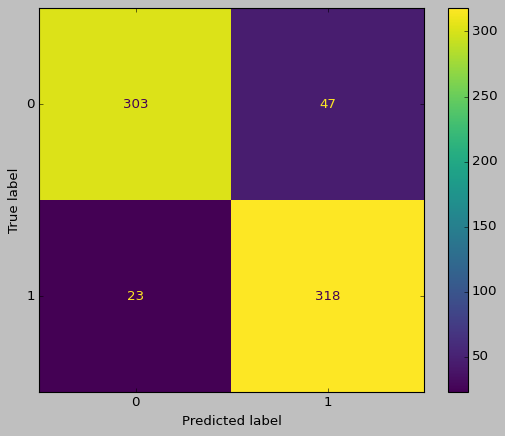

In [ ]:
#Confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
# Printing the results
print("FN: ", cm[1][0])
# Printing the results
print("TP: ", cm[1][1])
# Printing the results
print("FP: ", cm[0][1])

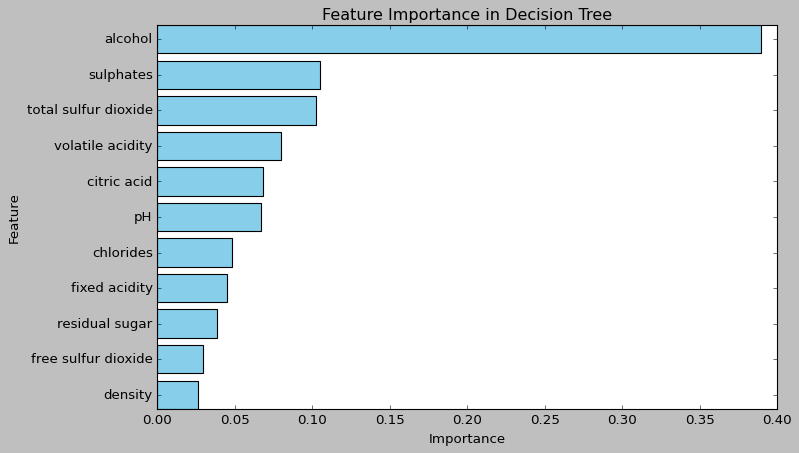

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#feature importances
feature_importances = dtree.feature_importances_
feature_names = X_train.columns
#Create a DataFrame for better visualization
importance_df = pd.DataFrame({
 'Feature': feature_names,
 'Importance': feature_importances
})
#Sorting the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
#Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
rforest = RandomForestClassifier()
#training
rforest.fit(X_train, y_train)
#testing
rforest_pred = rforest.predict(X_test)
# accuracy
rforest_acc = accuracy_score(rforest_pred, y_test)
# results
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 94.65%


In [ ]:
#results
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       350
           1       0.93      0.97      0.95       341

    accuracy                           0.95       691
   macro avg       0.95      0.95      0.95       691
weighted avg       0.95      0.95      0.95       691



TN:  324
FN:  11
TP:  330
FP:  26


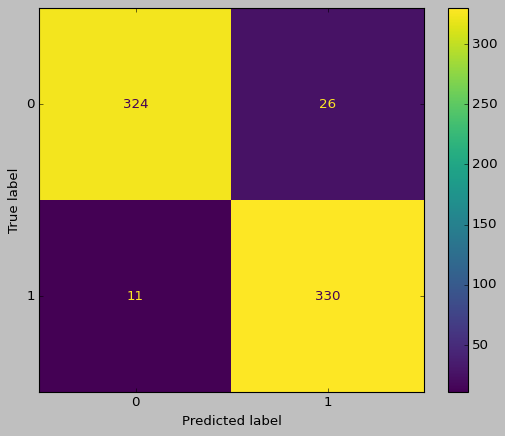

In [ ]:
#confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [ ]:
#5-fold cross-validation
from sklearn.model_selection import cross_val_score
#Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X_resampled, y_resampled, cv=5)
print("Logistic Regression CV Accuracy: {:.2f}%".format(logreg_cv_scores.mean() * 100))
#Decision Tree
dtree_cv_scores = cross_val_score(dtree, X_resampled, y_resampled, cv=5)
print("Decision Tree CV Accuracy: {:.2f}%".format(dtree_cv_scores.mean() * 100))
#Random Forest
rforest_cv_scores = cross_val_score(rforest, X_resampled, y_resampled, cv=5)
print("Random Forest CV Accuracy: {:.2f}%".format(rforest_cv_scores.mean() * 100))

Logistic Regression CV Accuracy: 79.88%
Decision Tree CV Accuracy: 86.51%
Random Forest CV Accuracy: 89.98%


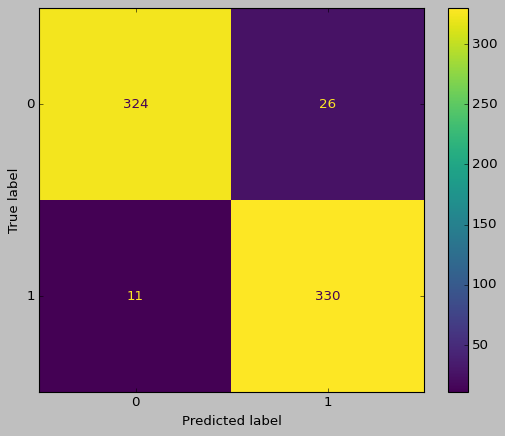

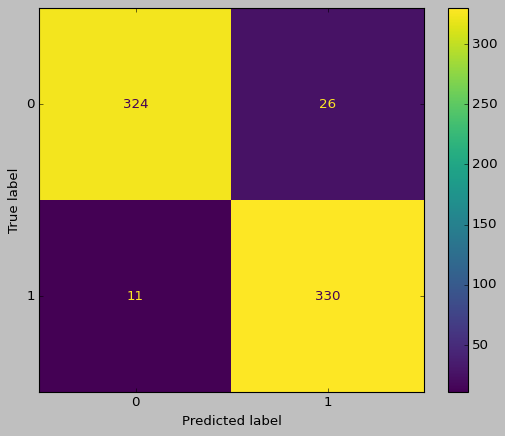

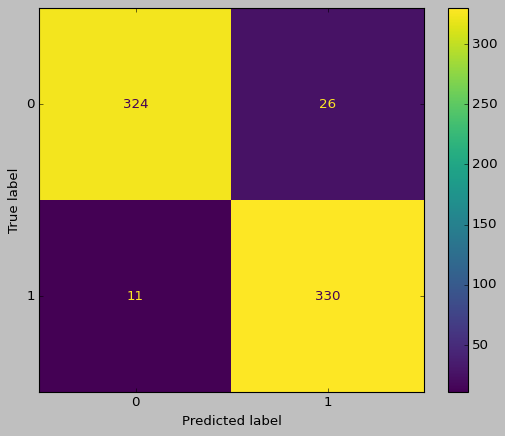

In [ ]:
#Logistic Regression
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
# Decision Tree
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()
# Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rforest.classes_)
disp.plot()

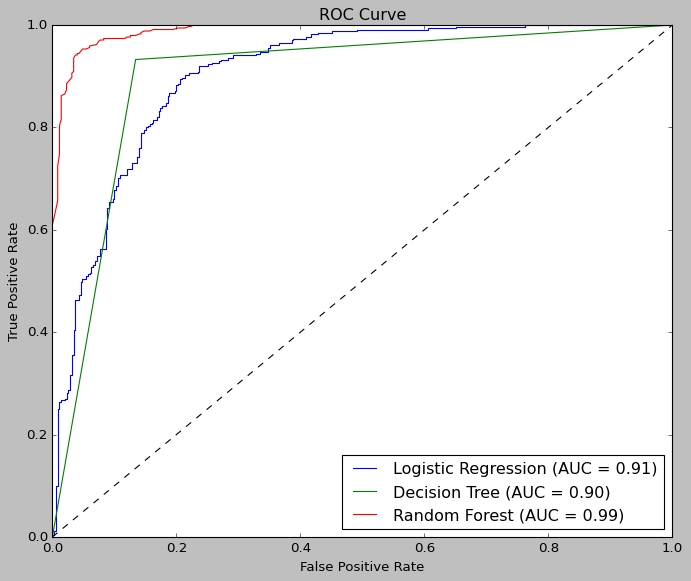

''

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Logistic Regression ROC and AUC
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
#Decision Tree ROC and AUC
dtree_probs = dtree.predict_proba(X_test)[:, 1]
dtree_auc = roc_auc_score(y_test, dtree_probs)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_probs)
#Random Forest ROC and AUC
rforest_probs = rforest.predict_proba(X_test)[:, 1]
rforest_auc = roc_auc_score(y_test, rforest_probs)
rforest_fpr, rforest_tpr, _ = roc_curve(y_test, rforest_probs)
# Plotting ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(dtree_fpr, dtree_tpr, label=f'Decision Tree (AUC = {dtree_auc:.2f})')
plt.plot(rforest_fpr, rforest_tpr, label=f'Random Forest (AUC = {rforest_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
""

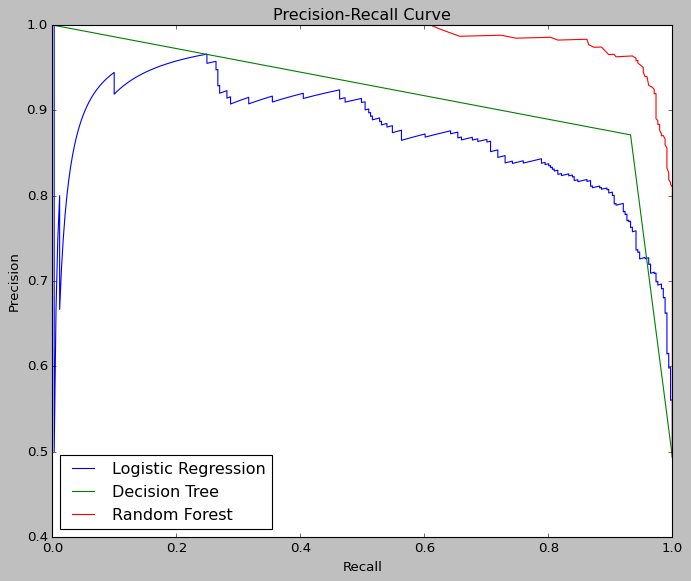

In [ ]:
from sklearn.metrics import precision_recall_curve
#Logistic Regression Precision-Recall
logreg_prec, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
# Decision Tree Precision-Recall
dtree_prec, dtree_recall, _ = precision_recall_curve(y_test, dtree_probs)
#random Forest Precision-Recall
rforest_prec, rforest_recall, _ = precision_recall_curve(y_test, rforest_probs)
# Plotting Precision-Recall Curves
plt.figure(figsize=(10, 8))
plt.plot(logreg_recall, logreg_prec, label=f'Logistic Regression')
plt.plot(dtree_recall, dtree_prec, label=f'Decision Tree')
plt.plot(rforest_recall, rforest_prec, label=f'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()